<br>
<img src="https://images.even3.com.br/ONieRmTALZ2ETt2LfoUY4_IopIU=/fit-in/250x250/smart/even3.blob.core.windows.net/logos/UFCSPA-logotipo-1.19fc99573cf34163a727.png" style="width: 100px;"/>
<center>Aprendizado profundo para Visão Computacional I
    <br>
    Prof. Carla Becker</center>
    
## <center>  **Aula 5: Valicação Cruzada** <center>

# <font color='blue'> Estudo de caso: Pima Indians Diabetes Database </font>
https://www.kaggle.com/uciml/pima-indians-diabetes-database

<img src="https://static.tuasaude.com/media/article/dr/nj/diabetes_52276_l.jpg" style="width: 200px;"/>

**O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem diabetes. Composto por dados de mulheres com 21 anos de idade ou mais.**

<br>

Descrição das variáveis:
- Número de vezes que engravidou
- Concentração de glicose plasmática a 2 horas em um - teste oral de tolerância à glicose
- Pressão arterial diastólica (mm Hg)
- Espessura da dobra da pele do tríceps (mm)
- Insulina sérica de 2 horas (muU/ml)
- Índice de massa corporal (kg/m2) 
- Diabetes Pedigree Function  (tendência ao desenvolvimento de diabetes) 
- Resultado: (0 = não possui diabetes ou 1 = possui diabetes)





### 1) Leitura dos dados

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('diabetes.csv') 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2) Identificando dados de entrada e dados de saída
Obs: Nenhum outro tratamento foi feito neste dataset (Remover dados duplicados, remover outliers, remover dados faltantes, remover ou substituir dados incompletos, feature engineering)

In [3]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']].values
Y=data['Outcome'].values

### 3) Separando dados para treino, validação e teste

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
X2, X_test, y2, y_test = train_test_split(X, Y, test_size=0.1,random_state=20,shuffle=True,stratify=Y) #separei 10% para teste, restante chamei de X2
X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size=0.2,random_state=20,shuffle=True,stratify=y2) #separei 10% para teste, restante chamei de X2

print('treino:',np.shape(X_train))
print('teste:',np.shape(X_test))
print('validação:',np.shape(X_val))

treino: (552, 8)
teste: (77, 8)
validação: (139, 8)


# <font color='blue'> Modelo de classificação binária </font>

### Criação do modelo

In [6]:
#primeiro vamos unir conjunto de treino e validação em um só conjunto.
inputs = np.concatenate((X_train, X_val), axis=0)
targets = np.concatenate((y_train, y_val), axis=0)

In [7]:
print('inputs:',np.shape(inputs))
print('targets:',np.shape(targets))


inputs: (691, 8)
targets: (691,)


### Etapa da Validação Cruzada (Kfolds) e criação do modelo


In [8]:
import tensorflow as tf
import keras as ke
from sklearn.model_selection import KFold
from keras import layers
from keras.layers import Dropout

In [9]:
tf.random.set_seed(20)   # fixar o pseudo-random generator do tensorflow
np.random.seed(20)       # fixar o pseudo-random generator do numpy

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html


#numero de folds: 
num_folds = 5

# Define per-fold score containers
acc_por_fold = []
loss_por_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation

fold_no = num_folds
for train, test in kfold.split(inputs, targets):
      
# Define the model architecture  
    
   model = ke.Sequential()
   model.add(ke.layers.Input(X_train.shape[1],))  #Camada de entrada: informando ao modelo quantas features eu tenho na entrada
   model.add(ke.layers.Dense(10, activation='relu'))
   #model.add(ke.layers.Dense(10, activation='relu'))
   #model.add(Dropout(0.20))
   model.add(ke.layers.Dense(1, activation='sigmoid')) # modelos de classificação binária sempre devem ter 1 neurônio na última camada

   model.summary()

  
  # Compile the model
   model.compile(loss='binary_crossentropy',metrics=['accuracy'])


  # Generate a print
   print('------------------------------------------------------------------------')
   print(f'Treinamento para o fold {fold_no} ..')

  # Fit data to model
   history = model.fit(inputs[train], targets[train],
              epochs=20,
              validation_data=(inputs[test], targets[test]) # aqui estamos monitorando os exemplos de validacao
               )
   
 # Generate generalization metrics
  
   score, acc =  model.evaluate(inputs[test], targets[test], verbose=0)
   print(f'Score para o fold {fold_no}: {model.metrics_names[0]} de {score}; {model.metrics_names[1]} de {acc*100}%')
   acc_por_fold.append(acc * 100) # aqui estamos criando uma lista com as accs dos 5 folds
   loss_por_fold.append(score)    # aqui estamos criando uma lista com as loss dos 5 folds

  # Increase fold number
   fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Scores para cada um dos folds:')

for i in range(0, len(acc_por_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_por_fold[i]} - Accurácia: {acc_por_fold[i]}%')
    
print('------------------------------------------------------------------------')
print('Média dos scores para todos os folds:')
print(f'> Accurácia: {np.mean(acc_por_fold)} (+- {np.std(acc_por_fold)})')
print(f'> Loss: {np.mean(loss_por_fold)}')
print('------------------------------------------------------------------------')
print(f'> Tamanho do conjunto de treinamento e conjunto de teste por fold: {(len(train), len(test))}')





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Treinamento para o fold 5 ..
Epoch 1/20
18/18 [==============================] - 2s 26ms/step - loss: 11.0985 - accuracy: 0.6051 - val_loss: 9.0813 - val_accuracy: 0.6187
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 8.8397 - accuracy: 0.6033 - val_loss: 7.3007 - val_accuracy: 0.5899
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss

18/18 [==============================] - 1s 22ms/step - loss: 7.5157 - accuracy: 0.4901 - val_loss: 7.0565 - val_accuracy: 0.4928
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 6.3504 - accuracy: 0.4955 - val_loss: 6.2894 - val_accuracy: 0.5145
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 5.7160 - accuracy: 0.4919 - val_loss: 5.8016 - val_accuracy: 0.4928
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 5.2060 - accuracy: 0.5045 - val_loss: 5.3489 - val_accuracy: 0.5000
Epoch 5/20
18/18 [==============================] - 0s 6ms/step - loss: 4.7815 - accuracy: 0.5190 - val_loss: 4.9559 - val_accuracy: 0.5217
Epoch 6/20
18/18 [==============================] - 0s 6ms/step - loss: 4.3547 - accuracy: 0.5208 - val_loss: 4.7448 - val_accuracy: 0.5290
Epoch 7/20
18/18 [==============================] - 0s 6ms/step - loss: 3.9781 - accuracy: 0.5371 - val_loss: 4.3920 - val_accuracy: 0.5145
Epoch 8/20
18/18 [============

18/18 [==============================] - 0s 5ms/step - loss: 2.6427 - accuracy: 0.5660 - val_loss: 2.4268 - val_accuracy: 0.5217
Epoch 8/20
18/18 [==============================] - 0s 6ms/step - loss: 2.4605 - accuracy: 0.5696 - val_loss: 2.3302 - val_accuracy: 0.5217
Epoch 9/20
18/18 [==============================] - 0s 6ms/step - loss: 2.3188 - accuracy: 0.5913 - val_loss: 2.1276 - val_accuracy: 0.5072
Epoch 10/20
18/18 [==============================] - 0s 6ms/step - loss: 2.1892 - accuracy: 0.5859 - val_loss: 2.0666 - val_accuracy: 0.5000
Epoch 11/20
18/18 [==============================] - 0s 6ms/step - loss: 2.0637 - accuracy: 0.5877 - val_loss: 2.0299 - val_accuracy: 0.4783
Epoch 12/20
18/18 [==============================] - 0s 6ms/step - loss: 1.9525 - accuracy: 0.5913 - val_loss: 2.2299 - val_accuracy: 0.4638
Epoch 13/20
18/18 [==============================] - 0s 5ms/step - loss: 1.8698 - accuracy: 0.5805 - val_loss: 1.8482 - val_accuracy: 0.5072
Epoch 14/20
18/18 [========

### Curvas de aprendizado (visualização do último fold)

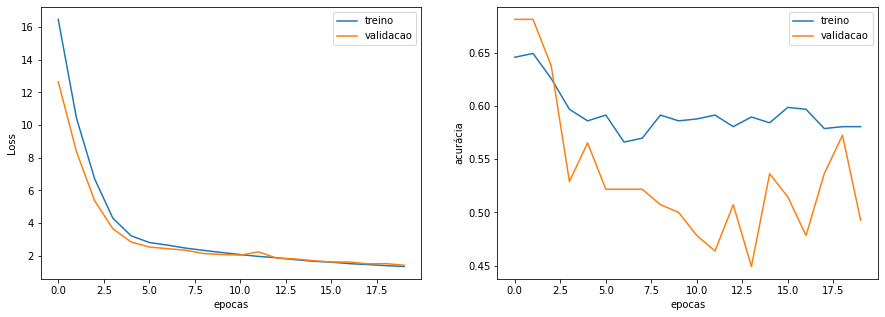

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("Loss")
plt.legend();

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="treino")
plt.plot(history.history["val_accuracy"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("acurácia")
plt.legend();

### Matriz de confusão

In [11]:
import sklearn.metrics as skm 
import seaborn as sn

# Avaliando separadamente o modelo nos dados de teste
Assumindo que os hiperparâmetros já foram ajustados, o modelo e que já chegamos na nossa melhor configuração.

Accuracy: 62.34%

3/3 [==============================] - 0s 3ms/step
48
              precision    recall  f1-score   support

         pos       0.72      0.68      0.70        50
         neg       0.47      0.52      0.49        27

    accuracy                           0.62        77
   macro avg       0.60      0.60      0.60        77
weighted avg       0.63      0.62      0.63        77

[[34 16]
 [13 14]]


<AxesSubplot:>

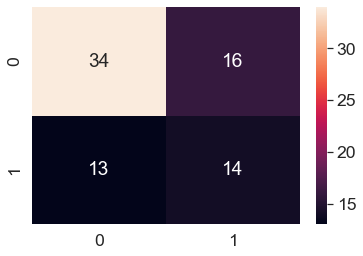

In [12]:
score, acc = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (acc*100))
print()

from sklearn.metrics import classification_report,confusion_matrix 

y_pred = model.predict(np.array(X_test))
#print(y_pred)

from sklearn.metrics import accuracy_score

y_pred = (y_pred > 0.5)  # limiar 50%
#print(y_pred)

print(accuracy_score(y_test, y_pred, normalize=False))


target_names = ['pos', 'neg']
cnf_matrix_test = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred, target_names=target_names))
print(cnf_matrix_test)


df_cm = pd.DataFrame(cnf_matrix_test, range(2), range(2))
sn.set(font_scale=1.6)
sn.heatmap(df_cm, annot=True, fmt='d')

# Calculando a taxa de erro através da matriz de confusão (dados de teste):

In [13]:
TP = cnf_matrix_test[1, 1]
TN = cnf_matrix_test[0, 0]
FP = cnf_matrix_test[0, 1]
FN = cnf_matrix_test[1, 0]

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.37662337662337664


In [14]:
# Calculando a acurácia através da matriz de confusão (dados de teste):

In [15]:
accuracy = (TP + TN)/float(TP + TN + FP + FN)
print(accuracy)

0.6233766233766234


In [16]:
# Calculando a Sensibilidade/Recall através da matriz de confusão (dados de teste):

In [17]:
sensitivity = (TP)/float(TP + FN) #OU RECALL
print(sensitivity) # essa é uma métrica de avalição muito importante na área médica

0.5185185185185185


In [18]:
# Calculando a Espedificidade através da matriz de confusão (dados de teste):

In [19]:
specificity = (TN)/float(TN + FP)
print(specificity)

0.68


In [20]:
# Calculando a precisão através da matriz de confusão (dados de teste):

In [21]:
precision = (TP)/float(TP + FP)
print(precision )

# OBS: A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os
# Falsos Negativos!! Por exemplo, no mercado de ações é necessário termos um bom modelo correto de previsão de compra. O modelo
# deve ser preciso em suas classificações, pois se consideramos um investimento bom, quando na verdade ele não é, teremos um 
# grande problema financeiro. Classificar uma boa ação como ruim (situação de Falso Negativo) no processo de compra é melhor
# do que classificar uma ação ruim como boa (situação de Falso Positivo).

0.4666666666666667


In [22]:
# Calculando o f1_score através da matriz de confusão (dados de teste):

In [23]:
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
print(f1_score) 


0.4912280701754386


# Curva ROC

AUC score: 0.5993


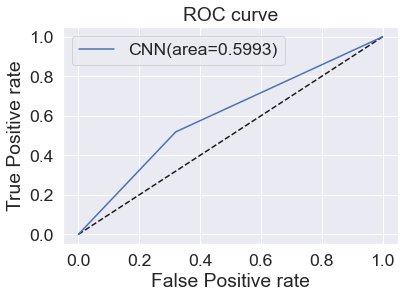

In [24]:
#ROC curve SITE IMPORTANTE
#https://www.kaggle.com/ramanchandra/sentiment-analysis-on-imdb-movie-reviews/data

from sklearn.metrics import roc_curve,auc

fpr_cnn,tpr_cnn,thresold_cnn=roc_curve(y_test,y_pred)

#AUC score for CNN

auc_cnn=auc(fpr_cnn,tpr_cnn)
print('AUC score:',np.round(auc_cnn,4)) # o 4 aqui é o número de casas após a vírgula (precisão)
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_cnn,tpr_cnn,label='CNN(area={:.4f})'.format(auc_cnn))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# TREINE O seu modelo final do zero, utilizando todos os dados que não sejam os de teste
(o modelo é o mesmo levantado na etapa de cross validation (após todos os ajustes de hiperparâmetros)

In [25]:
#primeiro vamos unir conjunto de treino e validação em um só conjunto.
inputs = np.concatenate((X_train, X_val), axis=0)
targets = np.concatenate((y_train, y_val), axis=0)

tf.random.set_seed(20)   # fixar o pseudo-random generator do tensorflow
np.random.seed(20)

model = ke.Sequential()
model.add(ke.layers.Input(inputs.shape[1],))  #Camada de entrada: informando ao modelo quantas features eu tenho na entrada
model.add(ke.layers.Dense(15, activation='relu'))
model.add(ke.layers.Dense(10, activation='relu'))
model.add(ke.layers.Dense(1, activation='sigmoid')) # modelos de classificação binária sempre devem ter 1 neurônio na última camada

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 15)                135       
                                                                 
 dense_11 (Dense)            (None, 10)                160       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history=model.fit(x=inputs,y=targets,epochs=40);

Epoch 1/40
22/22 [==============================] - 1s 3ms/step - loss: 3.2542 - accuracy: 0.4674
Epoch 2/40
22/22 [==============================] - 0s 3ms/step - loss: 1.4998 - accuracy: 0.5658
Epoch 3/40
22/22 [==============================] - 0s 3ms/step - loss: 1.2053 - accuracy: 0.5977
Epoch 4/40
22/22 [==============================] - 0s 3ms/step - loss: 1.1185 - accuracy: 0.6208
Epoch 5/40
22/22 [==============================] - 0s 3ms/step - loss: 0.9721 - accuracy: 0.6425
Epoch 6/40
22/22 [==============================] - 0s 3ms/step - loss: 0.9120 - accuracy: 0.6556
Epoch 7/40
22/22 [==============================] - 0s 3ms/step - loss: 0.8862 - accuracy: 0.6628
Epoch 8/40
22/22 [==============================] - 0s 3ms/step - loss: 0.8204 - accuracy: 0.6599
Epoch 9/40
22/22 [==============================] - 0s 3ms/step - loss: 0.7861 - accuracy: 0.6729
Epoch 10/40
22/22 [==============================] - 0s 3ms/step - loss: 0.7872 - accuracy: 0.6729
Epoch 11/40
22/22 [

# Avaliando separadamente os dados de teste
(para o modelo FINAL)

Accuracy: 72.73%

3/3 [==============================] - 0s 3ms/step
56
              precision    recall  f1-score   support

         pos       0.76      0.84      0.80        50
         neg       0.64      0.52      0.57        27

    accuracy                           0.73        77
   macro avg       0.70      0.68      0.69        77
weighted avg       0.72      0.73      0.72        77

[[42  8]
 [13 14]]


<AxesSubplot:>

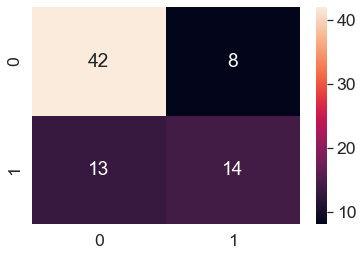

In [28]:
score, acc = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (acc*100))
print()

from sklearn.metrics import classification_report,confusion_matrix 

y_pred = model.predict(np.array(X_test))
#print(y_pred)

from sklearn.metrics import accuracy_score

y_pred = (y_pred > 0.5)  # limiar 50%
#print(y_pred)

print(accuracy_score(y_test, y_pred, normalize=False))


target_names = ['pos', 'neg']
cnf_matrix_test = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred, target_names=target_names))
print(cnf_matrix_test)


df_cm = pd.DataFrame(cnf_matrix_test, range(2), range(2))
sn.set(font_scale=1.6)
sn.heatmap(df_cm, annot=True, fmt='d')

In [29]:
TP = cnf_matrix_test[1, 1]
TN = cnf_matrix_test[0, 0]
FP = cnf_matrix_test[0, 1]
FN = cnf_matrix_test[1, 0]

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.2727272727272727


In [30]:
# Calculando a acurácia através da matriz de confusão (dados de teste):

In [31]:
accuracy = (TP + TN)/float(TP + TN + FP + FN)
print(accuracy)

0.7272727272727273


In [32]:
# Calculando a Sensibilidade/Recall através da matriz de confusão (dados de teste):

In [33]:
sensitivity = (TP)/float(TP + FN) #OU RECALL
print(sensitivity) # essa é uma métrica de avalição muito importante na área médica

0.5185185185185185


In [34]:
# Calculando a Espedificidade através da matriz de confusão (dados de teste):

In [35]:
specificity = (TN)/float(TN + FP)
print(specificity)

0.84


In [36]:
# Calculando a precisão através da matriz de confusão (dados de teste):

In [37]:
precision = (TP)/float(TP + FP)
print(precision )

# OBS: A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os
# Falsos Negativos!! Por exemplo, no mercado de ações é necessário termos um bom modelo correto de previsão de compra. O modelo
# deve ser preciso em suas classificações, pois se consideramos um investimento bom, quando na verdade ele não é, teremos um 
# grande problema financeiro. Classificar uma boa ação como ruim (situação de Falso Negativo) no processo de compra é melhor
# do que classificar uma ação ruim como boa (situação de Falso Positivo).

0.6363636363636364


In [38]:
# Calculando o f1_score através da matriz de confusão (dados de teste):

In [39]:
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
print(f1_score) 


0.5714285714285714


# Curva ROC

AUC score: 0.6793


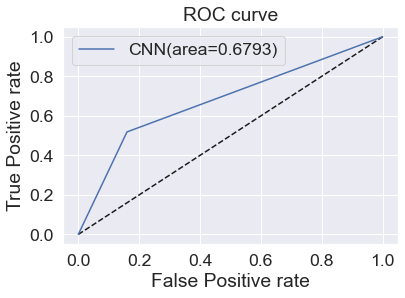

In [40]:
#ROC curve SITE IMPORTANTE
#https://www.kaggle.com/ramanchandra/sentiment-analysis-on-imdb-movie-reviews/data

from sklearn.metrics import roc_curve,auc

fpr_cnn,tpr_cnn,thresold_cnn=roc_curve(y_test,y_pred)

#AUC score for CNN

auc_cnn=auc(fpr_cnn,tpr_cnn)
print('AUC score:',np.round(auc_cnn,4)) # o 4 aqui é o número de casas após a vírgula (precisão)
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_cnn,tpr_cnn,label='CNN(area={:.4f})'.format(auc_cnn))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()